In [1]:
import profile_detections as PD #type: ignore
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

In [2]:
# Configure Matplotlib to use LaTeX for text rendering
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",  # Use 'serif' or specify the exact font family
    "font.serif": ["Times New Roman"],  # Replace with the font used in your LaTeX document
    "axes.labelsize": 12,  # Font size for axis labels
    "font.size": 12,  # General font size
    "legend.fontsize": 12,  # Font size for legend
    "xtick.labelsize": 12,  # Font size for x-axis tick labels
    "ytick.labelsize": 12,  # Font size for y-axis tick labels
})

In [3]:
montecarlokey="monte-carlo-009"
dataparams = {
    "montecarlokey":montecarlokey,
    "GCname":"Pal5",
    "NP":int(1e5),
    "MWpotential0":"pouliasis2017pii",
    "MWpotential1":"pouliasis2017pii-GCNBody",
    "internal_dynamics":"isotropic-plummer"
}
## HYPER PARAMETERS

hyperparams = {
    "xlims":[-10,10],
    "ylims":[-0.5,0.5],
    "noise_factor":5,
    "sigma":2,
    "box_length":20,
    "do_cross_correlation":False,
    "N_APPlY":2}

$$

\mathcal{R} = \log(N)\\


\delta \mathcal{R} = \frac{1}{N\ln(10)} \frac{d\mathcal{R}}{dN} = \frac{\sqrt{N}}{\ln(10)} \\

\mathcal{S/R} = 5 = \ln(10)\log_{10}(N)\sqrt{N}


In [4]:
# get data and properties for the plot 
data    =   PD.assemble_all_data_for_plot(dataparams,hyperparams)

Threshold for counts is 7


In [5]:
properties  =   PD.assemle_plot_properties(dataparams,hyperparams)

In [6]:
# get meta data
CENTERS     = data["append1Dprofiles"][0]
xsize       = np.mean(np.diff(CENTERS))
BOXLEN      = hyperparams["box_length"]*xsize
figtitle    = PD.make_title(dataparams["montecarlokey"],hyperparams["sigma"],hyperparams["noise_factor"],BOXLEN)
outname     = PD.make_outname(dataparams,hyperparams)
outname

'monte-carlo-009-pouliasis2017pii-GCNBody-2000-milisigma-5-noisefactor-20-boxcarindexlength-shifted-0.png'

In [7]:
hyperparams['xlims'] = [-10 + BOXLEN,10 - BOXLEN]

In [8]:
properties  =   PD.assemle_plot_properties(dataparams,hyperparams)

In [9]:
properties['add_gap_candidates_to_profiles']['color']="blue"
properties['add_gap_candidates_to_profiles']['alpha']=0.2
properties['add_gap_candidates_to_2D_plot']['color']="blue"
properties['add_gap_candidates_to_2D_plot']['alpha']=0.2
properties['append1Dprofiles'][1]['label']="Reference"
properties['append1Dprofiles'][2]['label']="Full"
properties['append1Dprofiles'][2]['color']="blue"
properties['append1Dprofiles'][2]['linestyle']="solid"
properties['append1Dprofiles'][3]['color']="black"
properties['append1Dprofiles'][3]['linestyle']=":"
properties['append2Dmaps'][0]['norm'] = mcolors.LogNorm(vmin=1e-5, vmax=6e-4)


In [10]:
def gspec_double_xy_profile():
    fig=plt.figure(figsize=(11,6))
    gs = fig.add_gridspec(3, 2, height_ratios=[1,1,3],width_ratios=[1, 1/100],wspace=0.05)
    ax0=fig.add_subplot(gs[0,0])
    ax1=fig.add_subplot(gs[1,0])
    ax2=fig.add_subplot(gs[2,0])
    cbar_ax = fig.add_subplot(gs[0:2,1])
    return fig,ax0,ax1,ax2,cbar_ax


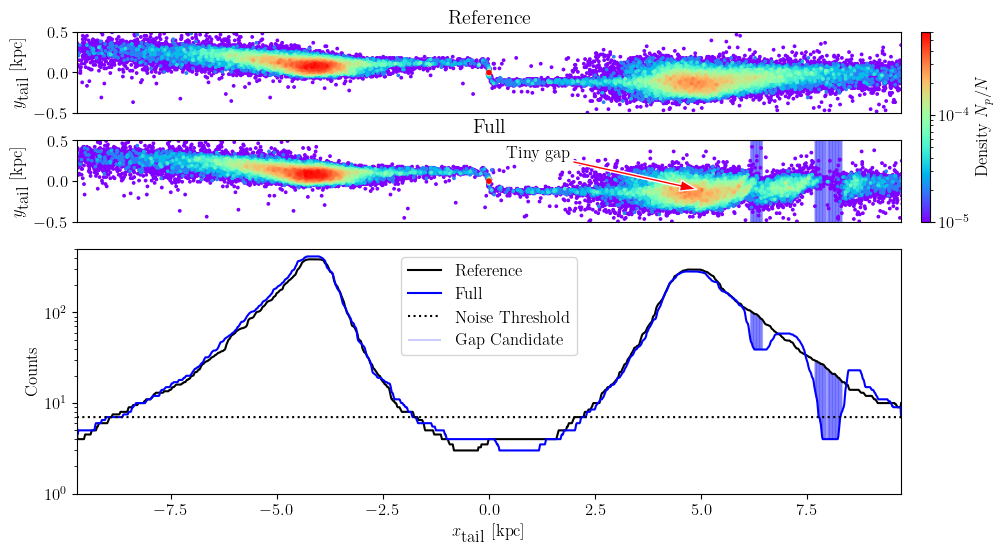

In [13]:
cbarlabel=r"Density $N_p/N$"
handles = gspec_double_xy_profile()
fig,ax0,ax1,ax2,cbar_ax = handles
fig = PD.doplot(handles,data,properties)

# ax1.text(5,0.6,"Small gap",color="black",alpha=1,ha="right")
ax1.annotate(
    "Tiny gap",  # Text to display
    xy=(4.9, -0.1),        # Point to annotate
    xytext=(0.4, 0.285),    # Position of the text
    arrowprops=dict(facecolor='red',edgecolor="white", width=2, headwidth=8)
)
ax0.set_title("Reference")
ax1.set_title("Full")
ax2.set_ylim(1e0,5e2)
ax2.legend()
ax2.set_ylabel("Counts")
ax2.set_xlabel(r"$x_{\textrm{tail}}$ [kpc]")
ax1.set_ylabel(r"$y_{\textrm{tail}}$ [kpc]")
ax0.set_ylabel(r"$y_{\textrm{tail}}$ [kpc]")
cbar_ax.set_ylabel(cbarlabel)

fig.savefig("../paper/"+outname,dpi=300)